## PCA on Heart disease dataset

#### Load the necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [3]:
data = pd.read_csv('heart.csv')

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Check for null values in the dataset

In [4]:
# check for null values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
column_names = data.columns

#### Remove the null values

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(data)

SimpleImputer()

##### Transform the data

In [8]:
transformed_data = imputer.transform(data)

#### Get the new dataframe

In [9]:
data_new = pd.DataFrame(transformed_data, columns = column_names)

data_new.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


### Project the data into new space with first 3 PCs

In [33]:
X_new = data_new.drop('TenYearCHD', axis = 1)

X_new[:5]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


#### Apply PCA

In [34]:
pca_new = PCA(n_components = 3)

X_pca = pca_new.fit_transform(X_new)

#### Create a new dataframe for projection

In [35]:
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])

#### Plot the principal components

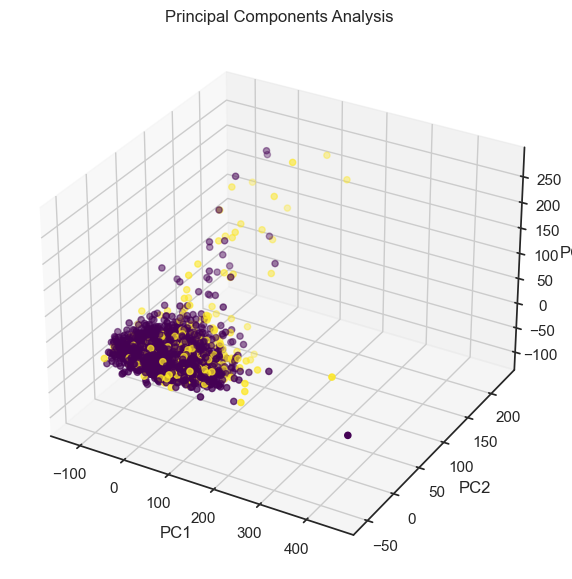

In [45]:
# Plot the principal components in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=data_new['TenYearCHD'], cmap='viridis')

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Principal Components Analysis')

# Show the plot
plt.show()

### Load the sklearn library

In [10]:
from sklearn import svm

x = data_new.drop('TenYearCHD', axis = 1)
y = data_new.TenYearCHD

#### Split the data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
x_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3188,1.0,63.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,190.0,148.0,90.0,27.13,72.0,86.0
764,1.0,45.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,125.0,89.0,27.98,85.0,83.0
3264,0.0,51.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,261.0,127.0,81.0,20.24,75.0,96.0
1967,1.0,45.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,250.0,126.0,89.5,28.68,75.0,92.0
2185,0.0,45.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,250.0,130.0,80.0,20.24,90.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,1.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,259.0,139.0,79.0,29.34,70.0,71.0
4056,1.0,44.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,130.0,80.0,28.15,80.0,74.0
4210,1.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0,126.5,88.0,27.30,85.0,87.0
3971,1.0,64.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,195.0,176.0,78.0,24.90,95.0,370.0


#### Train the model

In [14]:
classifier = svm.SVC()

classifier.fit(x_train, y_train)

SVC()

#### Make Predictions

In [15]:
predictions = classifier.predict(x_test)

In [16]:
classifier.support_vectors_

array([[  0.  ,  64.  ,   1.  , ...,  20.49,  68.  ,  96.  ],
       [  1.  ,  53.  ,   1.  , ...,  22.26,  73.  ,  73.  ],
       [  1.  ,  44.  ,   1.  , ...,  27.93,  95.  , 193.  ],
       ...,
       [  1.  ,  55.  ,   1.  , ...,  22.24,  90.  , 325.  ],
       [  1.  ,  68.  ,   1.  , ...,  33.16, 110.  , 148.  ],
       [  1.  ,  65.  ,   1.  , ...,  29.35,  77.  ,  97.  ]])

#### Get the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
conf_mat = confusion_matrix(y_test, predictions, labels=classifier.classes_)

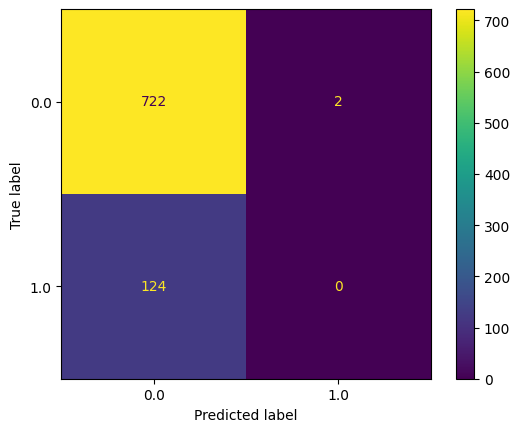

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = classifier.classes_)

disp.plot()

plt.show()

#### Get the accuracy score

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8514150943396226

 ### Use Principal Component Analysis

#### Load the library

In [21]:
from sklearn.decomposition import PCA

#### Create an instance of the model

In [22]:
pca = PCA(n_components = 3)

#### Fit the data

In [23]:
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.fit_transform(x_test)

#### Train the model using new data

In [24]:
classifier_new = svm.SVC()

classifier_new.fit(x_train_new, y_train)

SVC()

#### Make predictions

In [25]:
predictions_new = classifier_new.predict(x_test_new)

#### Get the confusion matrix

In [26]:
conf_mat_new = confusion_matrix(y_test, predictions_new, labels=classifier.classes_)

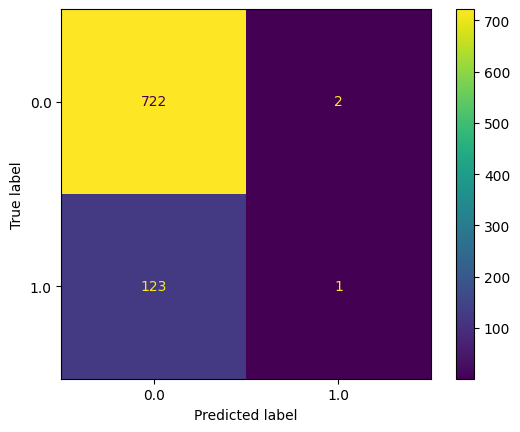

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat_new, display_labels = classifier.classes_)

disp.plot()

plt.show()

#### Get the accuracy score

In [28]:
accuracy_score(y_test, predictions_new)

0.8525943396226415

### Accuracy scores of both the methods are similar. PCA slightly improves the accuracy on this dataset